In [190]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [191]:
import numpy as np
import pandas as pd

In [192]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [193]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [194]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [195]:
# Declare a Base using `automap_base()`
Base = automap_base()
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables

In [196]:
# We can view all of the classes that automap found
# identifying table_classes fror further analysis

Base.classes.keys()


['measurement', 'station']

In [197]:
# Save references to each table
# tables in the database
Measurement = Base.classes.measurement
Station = Base.classes.station


In [198]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [199]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


## Design a query to retrieve the last 12 months of precipitation data and plot the results

In [200]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e5aa9e2188>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [201]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e5ab31a648>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [202]:
# Generating a list of date from the measurement table which would 
# be used to identify highest date then used to filter out last 12months from. I will 
# det filter withing 12 months by applying a method like the date methods from its library
temp_list = []
year_list = []
prcp_list = []
station_list = []
max_year = session.query(Measurement).filter(Measurement.date >= '2017-01-01')
print(" last 12 months of precipitation data")
for item in max_year:
    # making a list for year and precipitation for ploting
    year_list.append(item.date)
    prcp_list.append(item.prcp)
    station_list.append(item.station)
    temp_list.append(item.tobs)
    print(f"{item.station} date is {item.date} and Precipitation data is {item.prcp}")


 last 12 months of precipitation data
USC00519397 date is 2017-01-01 and Precipitation data is 0.0
USC00519397 date is 2017-01-02 and Precipitation data is 0.0
USC00519397 date is 2017-01-03 and Precipitation data is 0.0
USC00519397 date is 2017-01-04 and Precipitation data is 0.0
USC00519397 date is 2017-01-05 and Precipitation data is 0.0
USC00519397 date is 2017-01-06 and Precipitation data is 0.0
USC00519397 date is 2017-01-07 and Precipitation data is 0.0
USC00519397 date is 2017-01-08 and Precipitation data is 0.0
USC00519397 date is 2017-01-09 and Precipitation data is 0.0
USC00519397 date is 2017-01-10 and Precipitation data is 0.0
USC00519397 date is 2017-01-11 and Precipitation data is 0.0
USC00519397 date is 2017-01-12 and Precipitation data is 0.0
USC00519397 date is 2017-01-13 and Precipitation data is 0.0
USC00519397 date is 2017-01-14 and Precipitation data is 0.0
USC00519397 date is 2017-01-15 and Precipitation data is 0.0
USC00519397 date is 2017-01-16 and Precipitatio

## Calculate the date 1 year ago from the last data point in the database


In [203]:
date_for_1_year_list = []
date_1_year_ago = session.query(Measurement).filter(Measurement.date)
for item in date_1_year_ago:
    date_for_1_year_list.append(item.date)
date_split = max(date_for_1_year_list).split('-')
year_1_ago =int(date_split[0])-1
year_1_ago = str(year_1_ago)
date_split_update = date_split
date_split_update[0] = year_1_ago
date_split_update
date_1_year_ago ="-".join(date_split)
date_1_year_ago



'2016-08-23'

## Perform a query to retrieve the data and precipitation scores


In [204]:
data_and_preci_scores = session.query(Measurement)
for player in data_and_preci_scores:
    print(f"{player.station} precipitation score is {player.prcp}")

USC00519397 precipitation score is 0.08
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is None
USC00519397 precipitation score is 0.06
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.01
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.01
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.04
USC00519397 precipitation score is 0.12
USC00519397 precip

USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.2
USC00519397 precipitation score is 0.03
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.01
USC00519397 precipitation score is 0.19
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.1
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.0
USC00519397 precipitation score is 0.08
USC00519397 precipitation score is 0.46
USC00519397 precipitation score is 0.0
USC00519397 precipit

USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.01
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.01
USC00513117 precipitation score is 0.02
USC00513117 precipitation score is 0.02
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.02
USC00513117 precipitation score is 1.06
USC00513117 precipitation score is 0.52
USC00513117 precipitation score is 0.02
USC00513117 precipitation score is 0.03
USC00513117 precipitation score is 0.33
USC00513117 precipitation score is 1.54
USC00513117 precipitation score is 0.19
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.2
USC00513117 p

USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.22
USC00513117 precipitation score is 0.02
USC00513117 precipitation score is 0.11
USC00513117 precipitation score is 0.11
USC00513117 precipitation score is 0.03
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.05
USC00513117 precipitation score is 0.18
USC00513117 precipitation score is 0.14
USC00513117 precipitation score is 0.46
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.41
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.09
USC00513117 precipitation score is 1.03
USC00513117 precipitation score is 0.09
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.0
USC00513117 precipitation score is 0.01
USC00513117 precipitation score is 0.01
USC00513117 precipitation score is 0.01
USC00513117 precipitation score is 0.0
USC005131

USC00514830 precipitation score is 0.06
USC00514830 precipitation score is 0.12
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.11
USC00514830 precipitation score is 0.12
USC00514830 precipitation score is 0.03
USC00514830 precipitation score is 0.08
USC00514830 precipitation score is 0.07
USC00514830 precipitation score is 0.03
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.23
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.05
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is 0.02
USC00514830 precipitation score is 0.02
USC00514830 precipitation score is 0.04
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is 0.06
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is 0.03
USC00514830 precipitation score is 0.0
USC00

USC00514830 precipitation score is 0.05
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is 0.18
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is None
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.02
USC00514830 precipitation score is 0.03
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is 0.04
USC00514830 precipitation score is 0.03
USC00514830 precipitation score is 0.07
USC00514830 precipitation score is 0.4
USC00514830 precipitation score is 0.26
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is 0.2
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.02
USC00514830 precipitation score is 0.26
USC00514830 precipitation score is 0.0
USC00514830 precipitation score is None
USC00514830 precipitation score is 0.34
USC00514830 precipitation score is 0.12
USC00514830 precipitation score is 0.07
USC00514830 precipitation score is 0.0
USC00514

USC00518838 precipitation score is 0.04
USC00518838 precipitation score is None
USC00518838 precipitation score is 0.02
USC00518838 precipitation score is 0.0
USC00518838 precipitation score is 0.0
USC00518838 precipitation score is 0.02
USC00518838 precipitation score is None
USC00518838 precipitation score is None
USC00518838 precipitation score is 0.08
USC00518838 precipitation score is 1.0
USC00518838 precipitation score is None
USC00518838 precipitation score is 0.06
USC00518838 precipitation score is 0.01
USC00518838 precipitation score is 0.09
USC00518838 precipitation score is 0.01
USC00518838 precipitation score is None
USC00518838 precipitation score is 0.16
USC00518838 precipitation score is 0.03
USC00518838 precipitation score is 0.01
USC00518838 precipitation score is None
USC00518838 precipitation score is 0.02
USC00518838 precipitation score is 0.0
USC00518838 precipitation score is 0.89
USC00518838 precipitation score is 1.42
USC00518838 precipitation score is None
USC0

USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.03
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.38
USC00519523 precipitation score is 0.13
USC00519523 precipitation score is 0.43
USC00519523 precipitation score is 0.05
USC00519523 precipitation score is 0.23
USC00519523 precipitation score is 0.11
USC00519523 precipitation score is 0.02
USC00519523 precipitation score is 0.06
USC00519523 precipitation score is 0.17
USC00519523 precipitation score is 0.01
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.08
USC00519523 precipitation score is 0.06
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 1.07
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.01
USC00519523 precipitation score is 0.05
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC005195

USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.07
USC00519523 precipitation score is None
USC00519523 precipitation score is 0.02
USC00519523 precipitation score is None
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.11
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.33
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is 0.0
USC00519523 precipitation score is None
USC00519523 precipitation score is 0.05
USC00519523 preci

USC00519281 precipitation score is 0.02
USC00519281 precipitation score is 0.12
USC00519281 precipitation score is 0.09
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.2
USC00519281 precipitation score is 3.79
USC00519281 precipitation score is 1.26
USC00519281 precipitation score is 0.09
USC00519281 precipitation score is 0.03
USC00519281 precipitation score is 0.18
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.04
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.67
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.02
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 precipitation score is 0.0
USC00519281 pr

USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.01
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.06
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.01
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.04
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.01
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipit

USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.08
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.02
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.01
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.28
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is None
USC00511918 precipitation score is None
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.17
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precipitation score is 0.0
USC00511918 precip

USC00516128 precipitation score is 0.06
USC00516128 precipitation score is 1.73
USC00516128 precipitation score is 2.41
USC00516128 precipitation score is 0.39
USC00516128 precipitation score is 0.27
USC00516128 precipitation score is 0.71
USC00516128 precipitation score is 0.81
USC00516128 precipitation score is 0.49
USC00516128 precipitation score is 0.03
USC00516128 precipitation score is 0.0
USC00516128 precipitation score is 0.14
USC00516128 precipitation score is 0.07
USC00516128 precipitation score is 0.08
USC00516128 precipitation score is 0.02
USC00516128 precipitation score is 0.02
USC00516128 precipitation score is 0.05
USC00516128 precipitation score is 0.28
USC00516128 precipitation score is 0.47
USC00516128 precipitation score is 2.56
USC00516128 precipitation score is 0.11
USC00516128 precipitation score is 0.3
USC00516128 precipitation score is 0.43
USC00516128 precipitation score is 0.44
USC00516128 precipitation score is 0.05
USC00516128 precipitation score is 0.18
US

## Save the query results as a Pandas DataFrame and set the index to the date column


In [205]:
prcp_date_table = pd.DataFrame({
                                    "Date":year_list,
                                    "Precipitation":prcp_list
})
cleaned_prcp_date_table = prcp_date_table.dropna(how = "any")
setIndex_prcp_date_table = cleaned_prcp_date_table.set_index(["Date"])
setIndex_prcp_date_table

,Precipitation
Date,
2017-01-01,0.00
2017-01-02,0.00
2017-01-03,0.00
2017-01-04,0.00
2017-01-05,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


## Sort the dataframe by date


In [206]:
sorted_prcp_date_table =  setIndex_prcp_date_table.sort_index()


## Use Pandas Plotting with Matplotlib to plot the data


## Use Pandas to calcualte the summary statistics for the precipitation data

In [207]:
sorted_prcp_date_table.describe()

,Precipitation
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


## Design a query to show how many stations are available in this dataset?


In [208]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e5ab31a648>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

In [209]:
how_many_station = session.query(Station).count()
how_many_station


9

## What are the most active stations? (i.e. what stations have the most rows)?
## List the stations and the counts in descending order.


In [210]:
most_active_station = session.query(Measurement)
station_col = []
prcp_col = []
for item in most_active_station:
    station_col.append(item.station)
    prcp_col.append(item.prcp)
    
#station_col
station_table = pd.DataFrame({
    "station":station_col,
    "count":prcp_col
})
station_table_group = station_table.groupby(["station"])
station_table_group.count()


,count
station,
USC00511918,1932
USC00513117,2696
USC00514830,1937
USC00516128,2484
USC00517948,683
USC00518838,342
USC00519281,2772
USC00519397,2685
USC00519523,2572


In [211]:
sorted_table_station = station_table_group.count()
sorted_table_station.sort_values(by=['count'], ascending = False)

,count
station,
USC00519281,2772
USC00513117,2696
USC00519397,2685
USC00519523,2572
USC00516128,2484
USC00514830,1937
USC00511918,1932
USC00517948,683
USC00518838,342


## Using the station id from the previous query, calculate the lowest temperature recorded, 
## highest temperature recorded, and average temperature of the most active station?


In [212]:
 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [213]:
Temperature_stats= pd.DataFrame({
                                    "Date":year_list,
                                    "station": station_list,
                                    "temp":temp_list })
Temperature_stats

,Date,station,temp
0,2017-01-01,USC00519397,62.0
1,2017-01-02,USC00519397,66.0
2,2017-01-03,USC00519397,63.0
3,2017-01-04,USC00519397,62.0
4,2017-01-05,USC00519397,63.0
...,...,...,...
1392,2017-08-19,USC00516128,71.0
1393,2017-08-20,USC00516128,78.0
1394,2017-08-21,USC00516128,76.0
1395,2017-08-22,USC00516128,76.0


In [216]:
avg_temp_stats = Temperature_stats.groupby(["station"])
avg_temp_stats.describe()

temp                                                   
             count       mean       std   min   25%   50%   75%   max
station                                                              
USC00513117  212.0  72.485849  4.152860  61.0  70.0  73.0  76.0  82.0
USC00514830  195.0  76.943590  3.505797  63.0  75.0  77.0  79.5  83.0
USC00516128  222.0  72.045045  4.023432  58.0  69.0  72.0  75.0  82.0
USC00517948  107.0  74.056075  5.273343  62.0  70.0  75.0  78.0  87.0
USC00519281  221.0  72.144796  4.937503  59.0  69.0  73.0  76.0  83.0
USC00519397  230.0  74.926087  5.404084  60.0  72.0  77.0  79.0  87.0
USC00519523  210.0  76.728571  4.255887  60.0  74.0  77.0  80.0  85.0

In [ ]:
first_row = session.query(Measurement).first()
first_row.__dict__

In [ ]:
first_row = session.query(Station).first()
first_row.__dict__

In [ ]:
#temperature = []

#for item in station_measurement_join:
  #  print(f"{Measurement.station} {Measurement.tobs} {Station.name} ")

## Choose the station with the highest number of temperature observations.
## Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [217]:
highest_temp_station = Temperature_stats.loc[Temperature_stats["station"]=='USC00517948']
highest_temp_station

,Date,station,temp
637,2017-01-09,USC00517948,65.0
638,2017-01-10,USC00517948,65.0
639,2017-01-11,USC00517948,67.0
640,2017-01-12,USC00517948,67.0
641,2017-01-13,USC00517948,68.0
...,...,...,...
739,2017-07-25,USC00517948,81.0
740,2017-07-26,USC00517948,78.0
741,2017-07-27,USC00517948,79.0
742,2017-07-28,USC00517948,80.0


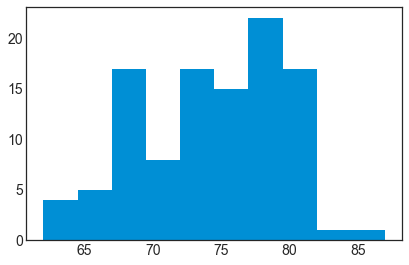

In [229]:
date = highest_temp_station['Date']
temp = highest_temp_station['temp']
plt.style.use('seaborn-white')
plt.hist(temp);


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
